In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load data
email_table = pd.read_csv('email_table.csv')
email_opened = pd.read_csv('email_opened_table.csv')
link_clicked = pd.read_csv('link_clicked_table.csv')

In [3]:
# 1. CTR and Open Rate Calculation
total_emails = email_table.shape[0]
opened = email_opened.shape[0]
clicked = link_clicked.shape[0]

open_rate = opened / total_emails * 100
click_rate = clicked / total_emails * 100

print(f"📬 Open Rate: {open_rate:.2f}%")
print(f"🔗 Click Through Rate (CTR): {click_rate:.2f}%")

📬 Open Rate: 10.35%
🔗 Click Through Rate (CTR): 2.12%


In [4]:
# 2. Prepare data for modeling
email_table['clicked'] = email_table['email_id'].isin(link_clicked['email_id']).astype(int)

# Encode categorical variables
email_table_encoded = pd.get_dummies(email_table, 
                                      columns=['email_text', 'email_version', 'weekday', 'user_country'],
                                      drop_first=True)

# Define features and target
X = email_table_encoded.drop(columns=['email_id', 'clicked'])
y = email_table_encoded['clicked']

In [5]:
# 3. Train-test split and model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
# 4. Model evaluation
print("\n🎯 Model Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


🎯 Model Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29326
           1       0.06      0.01      0.02       674

    accuracy                           0.97     30000
   macro avg       0.52      0.50      0.50     30000
weighted avg       0.96      0.97      0.97     30000

Accuracy: 0.9744


In [7]:
# 5. Estimate CTR if we used model (simulate sending only to high-score users)
y_pred_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.5
model_based_send = y_pred_proba >= threshold

simulated_ctr = y_test[model_based_send].sum() / model_based_send.sum() * 100
baseline_ctr = y_test.sum() / len(y_test) * 100
improvement = (simulated_ctr - baseline_ctr) / baseline_ctr * 100

print(f"\n🚀 Model-based CTR: {simulated_ctr:.2f}%")
print(f"📉 Baseline CTR: {baseline_ctr:.2f}%")
print(f"📈 Estimated CTR Improvement: {improvement:.2f}%")


🚀 Model-based CTR: 6.42%
📉 Baseline CTR: 2.25%
📈 Estimated CTR Improvement: 185.85%


In [8]:
# 6. Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n🔥 Top Predictive Features:\n", importances.head())


🔥 Top Predictive Features:
 hour                          0.455220
user_past_purchases           0.369836
email_text_short_email        0.036852
email_version_personalized    0.022925
weekday_Monday                0.015562
dtype: float64


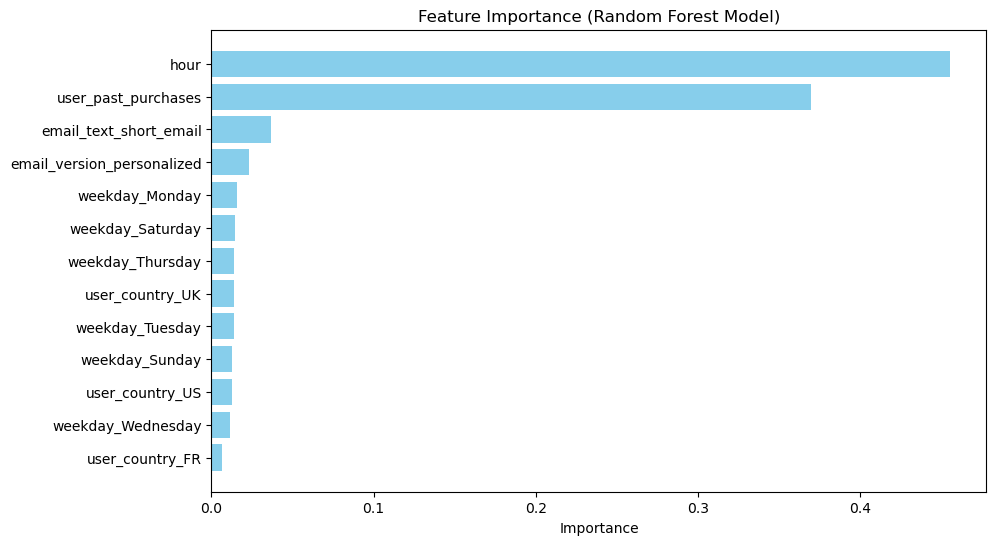

In [17]:
# Feature importance in the RandomForest model
import matplotlib.pyplot as plt

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest Model)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [22]:
# Import libraries
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# XGBoost Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Print evaluation metrics for XGBoost and Logistic Regression
print("🔍 XGBoost Evaluation:")
print(classification_report(y_test, xgb_pred))
print("✅ XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

print("\n🔍 Logistic Regression Evaluation:")
print(classification_report(y_test, lr_pred))
print("✅ Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


🔍 XGBoost Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29326
           1       0.14      0.00      0.00       674

    accuracy                           0.98     30000
   macro avg       0.56      0.50      0.50     30000
weighted avg       0.96      0.98      0.97     30000

✅ XGBoost Accuracy: 0.9773666666666667

🔍 Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29326
           1       0.00      0.00      0.00       674

    accuracy                           0.98     30000
   macro avg       0.49      0.50      0.49     30000
weighted avg       0.96      0.98      0.97     30000

✅ Logistic Regression Accuracy: 0.9775333333333334


C:\Users\asmig\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asmig\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asmig\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

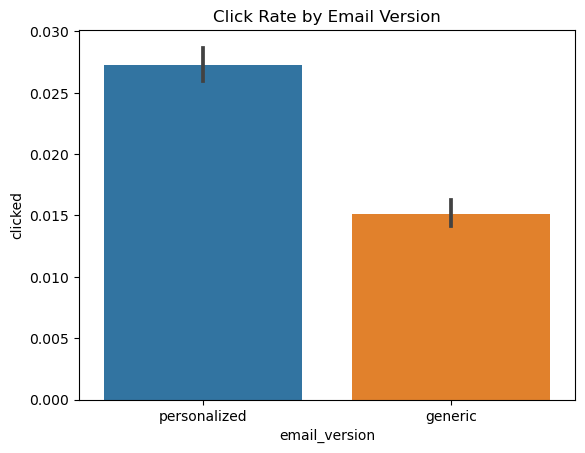

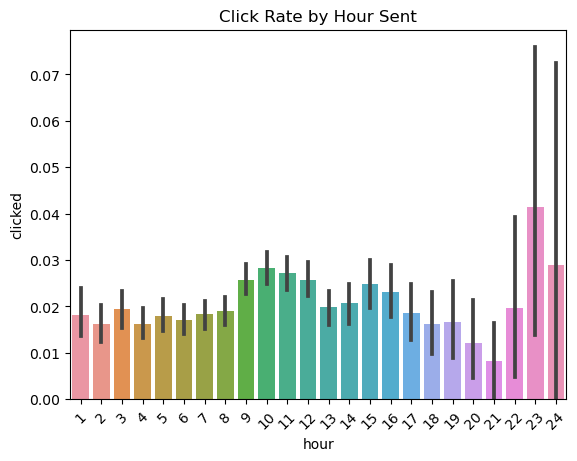

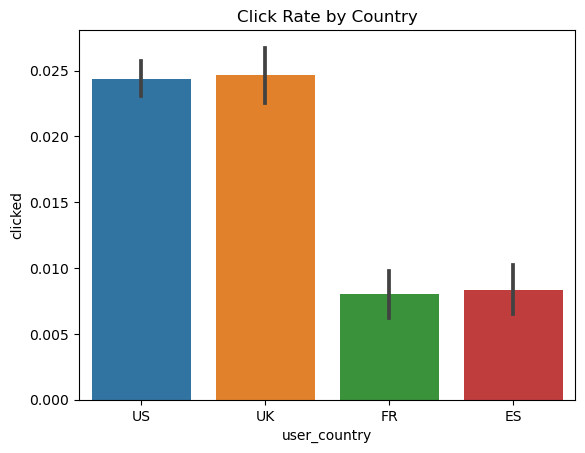

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Click rate by email version
sns.barplot(data=email_table, x='email_version', y='clicked')
plt.title("Click Rate by Email Version")
plt.show()

# Click rate by hour
sns.barplot(data=email_table, x='hour', y='clicked')
plt.title("Click Rate by Hour Sent")
plt.xticks(rotation=45)
plt.show()

# Click rate by country
sns.barplot(data=email_table, x='user_country', y='clicked')
plt.title("Click Rate by Country")
plt.show()


In [11]:
# 1. Create test email
new_email = pd.DataFrame([{
    'hour': 10,
    'user_past_purchases': 4,
    'email_text_short_email': 1,
    'email_version_personalized': 1,
    'weekday_Monday': 0,
    'weekday_Saturday': 1,
    'weekday_Sunday': 0,
    'weekday_Wednesday': 0,
    'user_country_UK': 0,
    'user_country_US': 1
}])

# 2. Align columns to training features
new_email = new_email.reindex(columns=X.columns, fill_value=0)

# 3. Predict
click_proba = model.predict_proba(new_email)[0][1]
click_pred = model.predict(new_email)[0]

print(f"🔮 Click Probability: {click_proba:.2f}")
print(f"✅ Will the user likely click? {'Yes' if click_pred == 1 else 'No'}")


🔮 Click Probability: 0.09
✅ Will the user likely click? No


In [13]:
# Example test data (as if it came from new_emails.csv)
test_data = pd.DataFrame([
    {
        'email_text': 'short_email',
        'email_version': 'personalized',
        'hour': 9,
        'weekday': 'Saturday',
        'user_country': 'US',
        'user_past_purchases': 3
    },
    {
        'email_text': 'long_email',
        'email_version': 'generic',
        'hour': 14,
        'weekday': 'Tuesday',
        'user_country': 'FR',
        'user_past_purchases': 1
    }
])


In [14]:
# One-hot encode test data
test_encoded = pd.get_dummies(test_data, columns=['email_text', 'email_version', 'weekday', 'user_country'])

# Align columns with training set
test_encoded = test_encoded.reindex(columns=X.columns, fill_value=0)


In [15]:
# Predict click probabilities and classes
click_probs = model.predict_proba(test_encoded)[:, 1]
click_preds = model.predict(test_encoded)

# Attach predictions back to original data
test_data['click_probability'] = click_probs
test_data['predicted_click'] = click_preds

print(test_data)


    email_text email_version  hour   weekday user_country  \
0  short_email  personalized     9  Saturday           US   
1   long_email       generic    14   Tuesday           FR   

   user_past_purchases  click_probability  predicted_click  
0                    3                0.0                0  
1                    1                0.0                0  


In [16]:
test_data.to_csv("email_prediction_results.csv", index=False)
